In [1]:
%matplotlib widget

import DataAnalysisClasses.FinalCurve as fc
import json
import matplotlib.pyplot as plt
from IPython.display import clear_output
from importlib import reload
# plt.style.use('dark_background')
plt.style.use('classic')
curves = []
from tqdm.notebook import tqdm
import random
import sys
from time import sleep
from IPython.display import clear_output
sys.setrecursionlimit(int(1e6))

In [2]:
reload(fc)

<module 'DataAnalysisClasses.FinalCurve' from '/mnt/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/DataAnalysisClasses/FinalCurve.py'>

# Load structure to visualize

In [3]:
with open(r"/mnt/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/DataAnalysisClasses/test9.json",
          "r") as read_file:
    data_in = json.load(read_file)

# Fling it into voxel structure from file

In [4]:
device_curve = fc.DeviceCurve(data_in,dynamic_model_use=True)

In [5]:
device_curve.calc_dynamic_dev_pos(rel=True,num=7)


7

In [6]:
device_curve.actualize_points_rel_glob()

In [7]:
device_curve.voxelize(400, 0.01)

In [8]:
total_nodes = device_curve.root_voxel.count_nodes()
total_points = device_curve.root_voxel.count_points()
print('Before')
print('Nodes: ', total_nodes)
print('Points: ', total_points)
device_curve.root_voxel.drop_unneeded_nodes()
total_nodes = device_curve.root_voxel.count_nodes()
total_points = device_curve.root_voxel.count_points()

print('After')
print('Nodes: ', total_nodes)
print('Points: ', total_points)

Before
Nodes:  42
Points:  3026
After
Nodes:  38
Points:  3026


In [9]:
device_curve.root_voxel.fit_all_planes()

In [10]:
device_curve.calc_points_opt_vect(0.5)
# device_curve.root_voxel.calc_points_opt_vect()

In [11]:
planes_data = device_curve.root_voxel.get_planes()
#quiver_data = device_curve.root_voxel.get_quiver()

In [12]:
# Extract voxel ranges
voxel_ranges = device_curve.export_voxels_wireframe()

In [ ]:
# Wizualizacja płaszczyzn dopasowania
if True:
    planes_data = device_curve.root_voxel.get_planes()
    plane_data_trans = []
    for vox in planes_data:
        p_list={'X':[],'Y':[],'Z':[]}
        for point in vox['vox']:
            p_list['X'].append(point['X'])
            p_list['Y'].append(point['Y'])
            p_list['Z'].append(point['Z'])
        #print(p_list)
        plane_data_trans.append(p_list)
    
    
    points = [[],[],[]]
    for pt in device_curve.measurements:
        if pt.position.pos_abs is not None:
            for point in random.sample(pt.scanner_points, int(len(pt.scanner_points)*0.07)):
                points[0].append(point.pos_glob_vect['X']) # x
                points[1].append(point.pos_glob_vect['Y']) # y
                points[2].append(point.pos_glob_vect['Z']) # z


    fig1 = plt.figure(figsize=(20,20))
    ax1 = fig1.add_subplot(projection='3d')
    ax1.set_xlabel('position X [m]')
    ax1.set_ylabel('position Y [m]')
    ax1.set_zlabel('position Z [m]')
    #plt.close()
    #num = 1
    #ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])
    for vox in plane_data_trans:
        #print(vox)
        ax1.plot_trisurf(vox['X'], vox['Y'], vox['Z'], alpha = 0.3, edgecolor = 'none')#,triangles=tri.triangles)#,length=0.1, normalize=True)
    # ax1.scatter(points[0],points[1],points[2], color='b', alpha=0.3, s=0.2)#,length=0.1, normalize=True)
    ax1.set_aspect('equal')
    #ax1.set_xlim(-0.30, -0.10)
    #ax1.set_ylim(-2.10, -1.90)
    #ax1.set_zlim(0.60, 0.80)
    #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
    #num = num+1
    #ax1.plot([0,1],[0,1],[0,1])
    
    fig1.tight_layout()
    plt.draw()
    plt.show()
    # print('done')

In [ ]:
# Funkcja do tworzenia siatki Voxeli
def list_of_lines_from_ranges(ranges_in):
            # self.range: Dict[str, float] = {'x_min': nan, 'x_max': nan,  # <x_min;x_max)
            #                             'y_min': nan, 'y_max': nan,  # <y_min;y_max)
            #                             'z_min': nan, 'z_max': nan}  # <z_min;z_max)
    line_list= [
        # x
        [ # y_min, z_min
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # y_max, z_min
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # y_min, z_max
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        [ # y_max, z_max
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        # y
        [ # x_min, z_min
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # x_max, z_min
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # x_min, z_max
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        [ # x_max, z_max
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        # z
        [ # x_min, y_min
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ],
        [ # x_max, y_min
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ],
        [ # x_min, y_max
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ],
        [ # x_max, y_max
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ]
    ]
    return line_list

In [ ]:
# Wizualizacja voxeli
if True:
    voxel_ranges = device_curve.export_voxels_wireframe()
    lines_wireframe = []
    # turn them to lines
    for ran in voxel_ranges:
        lines_wireframe.append({'level': ran['level'], 'lines':list_of_lines_from_ranges(ran['ranges'])})

# Wizualizacja Voxeli


    fig4 = plt.figure(figsize=(20,20))
    ax4 = fig4.add_subplot(projection='3d')
    ax4.set_xlabel('position X [m]')
    ax4.set_ylabel('position Y [m]')
    ax4.set_zlabel('position Z [m]')
    ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax4.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
    # ax4.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
    ax4.grid(False)
    fig4.patch.set_facecolor('white')
    ax4.patch.set_facecolor('white')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    ax4.tick_params(axis='x', colors='black')
    ax4.tick_params(axis='y', colors='black')
    ax4.tick_params(axis='z', colors='black')
    ax4.spines['bottom'].set_color('red')
    #plt.close()
    # Find_highest_level_number
    lv_max=0
    for vox in lines_wireframe:
        if vox['level']>lv_max:
            lv_max = vox['level']
    
    
    num = 1
    for i in range(1,lv_max+1):
        # komenda wyczyszczenia wykresu
        ax4.cla()
        ax4.set_xlabel('position X [m]')
        ax4.set_ylabel('position Y [m]')
        ax4.set_zlabel('position Z [m]')
        ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # ax4.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
        # ax4.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
        ax4.grid(False)
        fig4.patch.set_facecolor('white')
        ax4.patch.set_facecolor('white')
        ax4.xaxis.label.set_color('black')
        ax4.yaxis.label.set_color('black')
        ax4.tick_params(axis='x', colors='black')
        ax4.tick_params(axis='y', colors='black')
        ax4.tick_params(axis='z', colors='black')
        ax4.spines['bottom'].set_color('red')
        
        
        for vox in lines_wireframe:
            if vox['level']==i:
                for line in vox['lines']:
                    ax4.plot(line[0], line[1], line[2], 'k-',linewidth=1-(0.05*vox['level']),alpha=0.2+(0.02*vox['level']))
    ax4.set_aspect('equal')
    fig1.tight_layout()
    plt.draw()
    plt.show()
        # num = 1
        # for angle in range(0, 360):
        #     ax4.view_init(30, angle)
        #     #plt.draw()
        #     #plt.pause(.001)
        #     plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_5/'+str(i)+'/an_5_' +str(num).zfill(4),dpi=600, format = 'svg')
        #     num = num+1

In [ ]:
# Wizualizacja punktów i ścieżki
if True:
    device_curve.actualize_points_rel_glob()
    quiver_data_trans1 = [[],[],[]]
    quiver_data_trans2 = [[],[],[]]
    for pt in device_curve.measurements:
        if pt.position.pos_abs is not None:
            quiver_data_trans1[0].append(pt.position.pos_abs['X']) # x
            quiver_data_trans1[1].append(pt.position.pos_abs['Y']) # y
            quiver_data_trans1[2].append(pt.position.pos_abs['Z']) # z
            for point in  random.sample(pt.scanner_points, int(len(pt.scanner_points)*0.07)):
                quiver_data_trans2[0].append(point.pos_glob_vect['X']) # x
                quiver_data_trans2[1].append(point.pos_glob_vect['Y']) # y
                quiver_data_trans2[2].append(point.pos_glob_vect['Z']) # z
                # print(pt.position.pos_abs)



    
    fig1 = plt.figure(figsize=(20,20))
    ax1 = fig1.add_subplot(projection='3d')
    ax1.set_xlabel('position X [m]')
    ax1.set_ylabel('position Y [m]')
    ax1.set_zlabel('position Z [m]')
    #plt.close()
    num = 1
    #ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])
    
    ax1.scatter(quiver_data_trans2[0],quiver_data_trans2[1],quiver_data_trans2[2], color='b', alpha=1, s=0.2)#,length=0.1, normalize=True)
    # ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha=0.2)#,length=0.1, normalize=True)
    ax1.plot(quiver_data_trans1[0], quiver_data_trans1[1], quiver_data_trans1[2], color = 'r', marker = '.')#,length=0.1, normalize=True)
    #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
    num = num+1
    #ax1.plot([0,1],[0,1],[0,1])
    
    ax1.set_aspect('equal')
    fig1.tight_layout()
    plt.draw()
    plt.show()

In [ ]:
# Wizualizacja punktów z płaszczyznami dopasowanymi
if True:
    planes_data = device_curve.root_voxel.get_planes()
    plane_data_trans = []
    for vox in planes_data:
        p_list={'X':[],'Y':[],'Z':[]}
        for point in vox['vox']:
            p_list['X'].append(point['X'])
            p_list['Y'].append(point['Y'])
            p_list['Z'].append(point['Z'])
        #print(p_list)
        plane_data_trans.append(p_list)



    
    # Wizuslizacja punktów z wektorami lokalnymi oraz płaszczyznami dopasowania
    quiver_data_trans = [[],[],[],[],[],[]]
    for pt in device_curve.measurements:
        if pt.position.pos_abs is not None:
            for point, i in zip(pt.scanner_points, list(range(len(pt.scanner_points)))):
            # print(pt.position.pos_abs)
                if i%10 == 0:
                    quiver_data_trans[0].append(point.pos_glob_vect['X']) # x
                    quiver_data_trans[1].append(point.pos_glob_vect['Y']) # y
                    quiver_data_trans[2].append(point.pos_glob_vect['Z']) # z
                    quiver_data_trans[3].append(point.opt_vect['X']*1) # x
                    quiver_data_trans[4].append(point.opt_vect['Y']*1) # y
                    quiver_data_trans[5].append(point.opt_vect['Z']*1) # z
    
    # print(quiver_data_trans)
    fig1 = plt.figure(figsize=(20,20))
    
    ax1 = fig1.add_subplot(projection='3d')
    ax1.set_xlabel('position X [m]')
    ax1.set_ylabel('position Y [m]')
    ax1.set_zlabel('position Z [m]')
    #plt.close()
    
    #ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])
    for vox in plane_data_trans:
            #print(vox)
            ax1.plot_trisurf(vox['X'], vox['Y'], vox['Z'], alpha = 0.3, edgecolor = 'none')#,triangles=tri.triangles)#,length=0.1, normalize=True)
    ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5],arrow_length_ratio=0.30, color='k', alpha=0.9, lw = 2)#,length=0.1, normalize=True)
    # ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha = 0.9)#,length=0.1, normalize=True)
    ax1.plot(quiver_data_trans1[0], quiver_data_trans1[1], quiver_data_trans1[2], color = 'r')#,length=0.1, normalize=True)
    #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
    
    #ax1.plot([0,1],[0,1],[0,1])
    
    ax1.set_aspect('equal')attraction_coefficient=attraction_coefficientattraction_coefficient=attraction_coefficient
    fig1.tight_layout()
    plt.draw()
    plt.show()

In [ ]:
# Wizualizacja lokalnych wektorów optymalizacji na ścieżce skanera
if False:
    device_curve.update_loc_opt()
    # Wizualizacja punktów z wektorami lokalnymi oraz płaszczyznami dopasowania
    quiver_data_trans3 = [[],[],[],[],[],[],[],[],[]]
    for pt in device_curve.measurements:
        if pt.position.pos_abs is not None:
            # for point, i in zip(pt.scanner_points, list(range(len(pt.scanner_points)))):
            # print(pt.position.pos_abs)
                # if i%10 == 0:
            quiver_data_trans3[0].append(pt.position.pos_abs['X']) # x
            quiver_data_trans3[1].append(pt.position.pos_abs['Y']) # y
            quiver_data_trans3[2].append(pt.position.pos_abs['Z']) # z
            quiver_data_trans3[3].append(pt.position.opt_vect.pos_loc_vect['X']/10) # x
            quiver_data_trans3[4].append(pt.position.opt_vect.pos_loc_vect['Y']/10) # y
            quiver_data_trans3[5].append(pt.position.opt_vect.pos_loc_vect['Z']/10) # z
            quiver_data_trans3[6].append(pt.position.opt_vect.ang_loc_vect['X']/10) # x
            quiver_data_trans3[7].append(pt.position.opt_vect.ang_loc_vect['Y']/10) # y
            quiver_data_trans3[8].append(pt.position.opt_vect.ang_loc_vect['Z']/10) # z
    
    # print(quiver_data_trans)
    fig1 = plt.figure(figsize=(10,10))
    ax1 = fig1.add_subplot(projection='3d')
    ax1.set_xlabel('position X [m]')
    ax1.set_ylabel('position Y [m]')
    ax1.set_zlabel('position Z [m]')
    #plt.close()
    
    #ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])
    # for vox in plane_data_trans:
    #         #print(vox)
    #         ax1.plot_trisurf(vox['X'], vox['Y'], vox['Z'], alpha = 0.3, edgecolor = 'none')#,triangles=tri.triangles)#,length=0.1, normalize=True)
    ax1.quiver(quiver_data_trans3[0], quiver_data_trans3[1], quiver_data_trans3[2],quiver_data_trans3[3],quiver_data_trans3[4],quiver_data_trans3[5],arrow_length_ratio=0.30, color='k', alpha=0.2)#,length=0.1, normalize=True)
    # ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha = 0.9)#,length=0.1, normalize=True)
    ax1.plot(quiver_data_trans3[0], quiver_data_trans3[1], quiver_data_trans3[2], color = 'r')#,length=0.1, normalize=True)
    #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
    
    #ax1.plot([0,1],[0,1],[0,1])
    
    ax1.set_aspect('equal')
    fig1.tight_layout()
    plt.draw()
    plt.show()

In [ ]:
# Wizuslizacja globalnych wektorów optymalizacji na ścieżce skanera
if True:
    device_curve.update_glob_opt(rot=False, update_loc=False,max_speed=None, elasticity=None)
    quiver_data_trans4 = [[],[],[],[],[],[],[],[],[]]
    for pt in device_curve.measurements:
        if pt.position.pos_abs is not None:
            quiver_data_trans4[0].append(pt.position.pos_abs['X']) # x
            quiver_data_trans4[1].append(pt.position.pos_abs['Y']) # y
            quiver_data_trans4[2].append(pt.position.pos_abs['Z']) # z
            quiver_data_trans4[3].append(pt.position.opt_vect.pos_glob_vect['X']/10) # x
            quiver_data_trans4[4].append(pt.position.opt_vect.pos_glob_vect['Y']/10) # y
            quiver_data_trans4[5].append(pt.position.opt_vect.pos_glob_vect['Z']/10) # z
            quiver_data_trans4[6].append(pt.position.opt_vect.ang_glob_vect['X']/10) # x
            quiver_data_trans4[7].append(pt.position.opt_vect.ang_glob_vect['Y']/10) # y
            quiver_data_trans4[8].append(pt.position.opt_vect.ang_glob_vect['Z']/10) # z
    
    # print(quiver_data_trans)
    # fig1 = plt.figure()
    fig1 = plt.figure(figsize=(10,10))
    ax1 = fig1.add_subplot(projection='3d')
    ax1.set_xlabel('position X [m]')
    ax1.set_ylabel('position Y [m]')
    ax1.set_zlabel('position Z [m]')
    #plt.close()
    num = 1
    #ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])
    
    ax1.quiver(quiver_data_trans4[0], quiver_data_trans4[1], quiver_data_trans4[2],quiver_data_trans4[3],quiver_data_trans4[4],quiver_data_trans4[5],arrow_length_ratio=0.30, color='k', alpha=0.2)#,length=0.1, normalize=True)
    ax1.quiver(quiver_data_trans4[0], quiver_data_trans4[1], quiver_data_trans4[2],quiver_data_trans4[6],quiver_data_trans4[7],quiver_data_trans4[8],arrow_length_ratio=0.30, color='g', alpha = 0.2)#,length=0.1, normalize=True)
    ax1.plot(quiver_data_trans4[0], quiver_data_trans4[1], quiver_data_trans4[2], color = 'r')#,length=0.1, normalize=True)
    #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
    num = num+1
    #ax1.plot([0,1],[0,1],[0,1])
    fig1.tight_layout()
    ax1.set_aspect('equal')
    plt.draw()
    plt.show()

In [14]:
prev_use = 0.97
count = 0

In [15]:
prev_vect = []

for meas in device_curve.measurements:
    if meas.conf.optimize_pos:
        prev_vect.append({'lin':meas.position.opt_vect.pos_glob_vect.copy(), 'ang':meas.position.opt_vect.ang_glob_vect.copy()})
    else:
        prev_vect.append(None)

move_hist_raw=[]
move_hist_use=[]

# j = 0

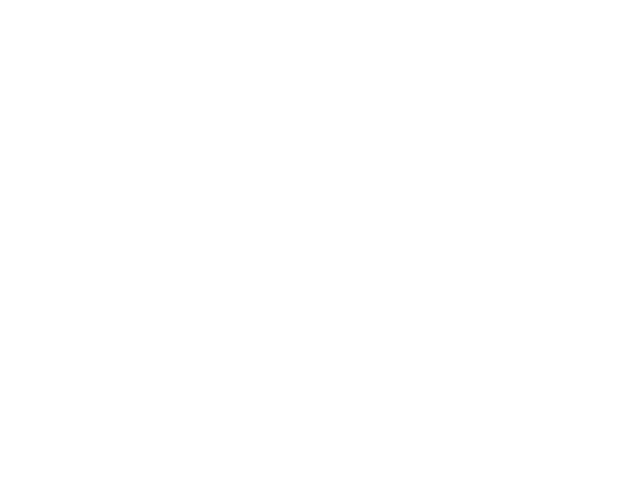

In [16]:
fig = plt.figure()
plt.show()

In [17]:
device_curve.actualize_dev_pos_delta()
device_curve.actualize_points_rel_glob()
print('Prędkości początkowe')
print(device_curve.measurements[device_curve.indexes.kalman_index_now].position.speed_abs)
curves = []



for i in range(5000):
    print(i)
    # Nowa Voxelizacja
    # print('voxel')
    device_curve.voxelize(250, 0.015,sample_in = None, points_use=11e3)
    # print('dropping')
    device_curve.root_voxel.drop_unneeded_nodes()
    # Dopasuj płaszczyzny do punktów
    # print('filling')
    device_curve.root_voxel.fit_all_planes()
    # Przyporządkuj wektory do punktów pomiarowych
    device_curve.root_voxel.calc_points_opt_vect(attraction_coefficient=0.5)
    device_curve.update_loc_opt()
    # Przenieś wektory z punktów na pozycje skanera 
    device_curve.update_glob_opt(rot=True, update_loc=False,max_speed=0.05, elasticity=5000)
    # print('asd')
    # Dołożenie inercji do wektora optymalizacji
    if prev_use>0:
        for meas, prev in zip(device_curve.measurements, prev_vect):
            if meas.conf.optimize_pos:
                if prev is not None:
                    for key in meas.position.opt_vect.pos_glob_vect:
                        meas.position.opt_vect.pos_glob_vect[key] = meas.position.opt_vect.pos_glob_vect[key] * (1-prev_use) + prev['lin'][key] * prev_use
                        prev['lin'][key] = meas.position.opt_vect.pos_glob_vect[key] # + prev['lin'][key] if i>0 else 0 * prev_use
                else:
                    prev = {'lin':{}}
                    for key in meas.position.opt_vect.pos_glob_vect:
                        prev['lin'][key] = meas.position.opt_vect.pos_glob_vect[key] # + prev['lin'][key] if i>0 else 0 * prev_use
    # j+=1
    # Modyfikuj przesumięcia między położeniami skanera
    # print('psk')
    max_move, fin_move = device_curve.move_rel_pos(elast_lin=0.0001,elast_rot=0.002, rot=False, mode= 'const', max_move=0.5)
    move_hist_raw.append(max_move)
    move_hist_use.append(fin_move)
    # Aktualizuj globalne położenia skanera
    # print('Po aktualizacji delty')
    device_curve.actualize_dev_pos_global()
    # print(device_curve.measurements[device_curve.indexes.kalman_index_now].position.speed_abs)
    # Aktualizuj globalne położenia punktów pomiariwych 
    # print('Po aktualizacji pozycji absolutnej')
    device_curve.actualize_points_rel_glob()
    # print(device_curve.measurements[device_curve.indexes.kalman_index_now].position.speed_abs)
    # print('oemf')
    
    quiver_data_trans1 = [[],[],[]]
    for pt in device_curve.measurements:
        if pt.conf.available:
            for point in pt.scanner_points:
                quiver_data_trans1[0].append(pt.position.pos_abs['X']) # x
                quiver_data_trans1[1].append(pt.position.pos_abs['Y']) # y
                quiver_data_trans1[2].append(pt.position.pos_abs['Z']) # z
    curves.append(quiver_data_trans1)

    if len(move_hist_raw)>3:
        plt.clf()
        if len(move_hist_raw)>=200:
            tmp1 = move_hist_raw[-200:]
            tmp2 = move_hist_use[-200:]
            plt.plot(list(range(len(move_hist_raw[-200:]))), move_hist_raw[-200:])
            plt.plot(list(range(len(move_hist_use[-200:]))), move_hist_use[-200:])
        else:
            plt.plot(list(range(len(move_hist_raw))), move_hist_raw)
            plt.plot(list(range(len(move_hist_raw))), move_hist_use)
        fig.canvas.draw()
    # sleep(0.005)
        



    if len(move_hist_raw)>20 and max(move_hist_raw[-10:])<0.0015 and count>=5:
        count = 0
        device_curve.indexes.last_opt_pos_index = device_curve.indexes.kalman_index_now
        device_curve.calc_dynamic_dev_pos(rel=True,num=1)
    else:
        count += 1
    # clear_output()

Prędkości początkowe
{'Y': -0.029648562213001967, 'X': 0.23939916994901062, 'Z': 0.054745754770086565}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


AttributeError: Memoryview is not initialized

In [ ]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

# ax1.scatter(quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5], color='w', alpha=0.2, s=0.2)#,length=0.1, normalize=True)
# ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha=0.2)#,length=0.1, normalize=True)
for curve, ind in zip(curves[-20:], list(range(len(curves[-20:])))):
    ax1.plot(curve[0], curve[1], curve[2], label = str(ind))#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])

plt.legend()
plt.draw()
plt.show()

In [21]:
plt.close()

In [ ]:
device_curve.indexes.last_opt_pos_index = device_curve.indexes.kalman_index_now

device_curve.calc_dynamic_dev_pos(rel=True,num=5)
# prev_vect = []

# for meas in device_curve.measurements:
#     if meas.conf.optimize_pos:
#         prev_vect.append({'lin':meas.position.opt_vect.pos_glob_vect.copy(), 'ang':meas.position.opt_vect.ang_glob_vect.copy()})
#     else:
#         prev_vect.append(None)

# prev_use = 0.7

# j = 0

In [ ]:


device_curve.voxelize(1000, 0.01)
# Dopasuj płaszczyzny do punktów
device_curve.root_voxel.fit_all_planes()
# Przyporządkuj wektory do punktów pomiarowych
device_curve.root_voxel.calc_points_opt_vect()
# Przenieś wektory z punktów na pozycje skanera 
device_curve.update_glob_opt(rot=True, update_loc=True,max_speed=0.01, elasticity=1000)



# Modyfikuj przesumięcia między położeniami skanera
device_curve.move_rel_pos(elast_lin=0.0001,elast_rot=0.002, rot=False, mode= 'const', max_move=0.01)
# Aktualizuj globalne położenia skanera
device_curve.actualize_dev_pos_global()
# Aktualizuj globalne położenia punktów pomiariwych 
device_curve.actualize_points_rel_glob()

In [ ]:
device_curve2.voxelize(5000, 0.02)
device_curve2.root_voxel.fit_all_planes()
device_curve2.root_voxel.calc_points_opt_vect()

In [ ]:
# Extract voxel ranges
planes_data2 = device_curve2.root_voxel.get_planes()
voxel_ranges = device_curve2.export_voxels_wireframe()

plane_data_trans2 = []
for vox in planes_data2:
    p_list={'X':[],'Y':[],'Z':[]}
    for point in vox['vox']:
        p_list['X'].append(point['X'])
        p_list['Y'].append(point['Y'])
        p_list['Z'].append(point['Z'])
    #print(p_list)
    plane_data_trans2.append(p_list)

#print(plane_data_trans)

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
#num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])
for vox in plane_data_trans2:
    #print(vox)
    ax1.plot_trisurf(vox['X'], vox['Y'], vox['Z'])#,triangles=tri.triangles)#,length=0.1, normalize=True)
    
ax1.set_aspect('equal')
#ax1.set_xlim(-0.30, -0.10)
#ax1.set_ylim(-2.10, -1.90)
#ax1.set_zlim(0.60, 0.80)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
#num = num+1
#ax1.plot([0,1],[0,1],[0,1])


# plt.draw()
plt.show()

In [ ]:
device_curve2.update_glob_opt(rot=True, update_loc=True,max_speed=0.1, elasticity=100)

In [ ]:
quiver_data_trans = [[],[],[],[],[],[]]
for pt in device_curve2.measurements:
    quiver_data_trans[0].append(pt.position.pos_abs['X']) # x
    quiver_data_trans[1].append(pt.position.pos_abs['Y']) # y
    quiver_data_trans[2].append(pt.position.pos_abs['Z']) # z
    quiver_data_trans[3].append(pt.position.opt_vect.ang_loc_vect['X']) # x
    quiver_data_trans[4].append(pt.position.opt_vect.ang_loc_vect['Y']) # y
    quiver_data_trans[5].append(pt.position.opt_vect.ang_loc_vect['Z']) # z
print([x[:10] for x in quiver_data_trans])

In [ ]:
device_curve2.measurements[0].position.opt_vect.ang_glob_vect

In [ ]:
quiver_data_trans = [[],[],[],[],[],[],[],[],[]]
for pt in device_curve2.measurements:
    quiver_data_trans[0].append(pt.position.pos_abs['X']) # x
    quiver_data_trans[1].append(pt.position.pos_abs['Y']) # y
    quiver_data_trans[2].append(pt.position.pos_abs['Z']) # z
    quiver_data_trans[3].append(pt.position.opt_vect.pos_glob_vect['X']/1000) # x
    quiver_data_trans[4].append(pt.position.opt_vect.pos_glob_vect['Y']/1000) # y
    quiver_data_trans[5].append(pt.position.opt_vect.pos_glob_vect['Z']/1000) # z
    quiver_data_trans[6].append(pt.position.opt_vect.ang_glob_vect['X']/100) # x
    quiver_data_trans[7].append(pt.position.opt_vect.ang_glob_vect['Y']/100) # y
    quiver_data_trans[8].append(pt.position.opt_vect.ang_glob_vect['Z']/100) # z

# print(quiver_data_trans)
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5],arrow_length_ratio=0.10, color='w', alpha=0.2)#,length=0.1, normalize=True)
ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha = 0.2)#,length=0.1, normalize=True)
ax1.plot(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2], color = 'r')#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])


plt.draw()
plt.show()

In [ ]:
quiver_data_trans = [[],[],[],[],[],[],[],[],[]]
for pt in device_curve2.measurements:
    quiver_data_trans[0].append(pt.position.pos_abs['X']) # x
    quiver_data_trans[1].append(pt.position.pos_abs['Y']) # y
    quiver_data_trans[2].append(pt.position.pos_abs['Z']) # z
    quiver_data_trans[3].append(pt.position.opt_vect.pos_loc_vect['X']/100) # x
    quiver_data_trans[4].append(pt.position.opt_vect.pos_loc_vect['Y']/100) # y
    quiver_data_trans[5].append(pt.position.opt_vect.pos_loc_vect['Z']/100) # z
    quiver_data_trans[6].append(pt.position.opt_vect.ang_loc_vect['X']/10) # x
    quiver_data_trans[7].append(pt.position.opt_vect.ang_loc_vect['Y']/10) # y
    quiver_data_trans[8].append(pt.position.opt_vect.ang_loc_vect['Z']/10) # z

# print(quiver_data_trans)
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5],arrow_length_ratio=0.10, color='w', alpha=0.2)#,length=0.1, normalize=True)
ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha=0.2)#,length=0.1, normalize=True)
ax1.plot(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2], color = 'r')#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])


plt.draw()
plt.show()

In [ ]:
# teraz trzeba przeskalować te wektory po sztywności i ewentualnie dodać argument od przesumięcia 
quiver_data_trans = [[],[],[],[],[],[],[],[],[]]
for pt in device_curve2.measurements:
    for point in pt.scanner_points:
        quiver_data_trans[0].append(pt.position.pos_abs['X']) # x
        quiver_data_trans[1].append(pt.position.pos_abs['Y']) # y
        quiver_data_trans[2].append(pt.position.pos_abs['Z']) # z
        quiver_data_trans[3].append(point.pos_glob_vect['X']) # x
        quiver_data_trans[4].append(point.pos_glob_vect['Y']) # y
        quiver_data_trans[5].append(point.pos_glob_vect['Z']) # z

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

ax1.scatter(quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5], color='w', alpha=0.2, s=0.2)#,length=0.1, normalize=True)
# ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha=0.2)#,length=0.1, normalize=True)
ax1.plot(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2], color = 'r')#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])


plt.draw()
plt.show()

In [ ]:
curves = []

In [ ]:
import sys
import gc
sys.setrecursionlimit(1000000)
gc.collect()
plt.close()

In [ ]:

for i in range(100):
    print(i)
    # Nowa Voxelizacja
    device_curve2.voxelize(1000, 0.02)
    # Dopasuj płaszczyzny do punktów
    device_curve2.root_voxel.fit_all_planes()
    # Przyporządkuj wektory do punktów pomiarowych
    device_curve2.root_voxel.calc_points_opt_vect()
    # Przenieś wektory z punktów na pozycje skanera 
    device_curve2.update_glob_opt(rot=True, update_loc=True,max_speed=0.01, elasticity=500)
    
    
    
    # Modyfikuj przesumięcia między położeniami skanera
    device_curve2.move_rel_pos(elast_lin=0.000001,elast_rot=0.002, rot=False, mode= 'const', max_move=0.01)
    # Aktualizuj globalne położenia skanera
    device_curve2.actualize_dev_pos_global()
    # Aktualizuj globalne położenia punktów pomiariwych 
    device_curve2.actualize_points_rel_glob()
    quiver_data_trans1 = [[],[],[]]
    for pt in device_curve2.measurements:
        for point in pt.scanner_points:
            quiver_data_trans1[0].append(pt.position.pos_abs['X']) # x
            quiver_data_trans1[1].append(pt.position.pos_abs['Y']) # y
            quiver_data_trans1[2].append(pt.position.pos_abs['Z']) # z
    curves.append(quiver_data_trans1)

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

# ax1.scatter(quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5], color='w', alpha=0.2, s=0.2)#,length=0.1, normalize=True)
# ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha=0.2)#,length=0.1, normalize=True)
for curve, ind in zip(curves[-10:], list(range(len(curves[-10:])))):
    ax1.plot(curve[0], curve[1], curve[2], label = str(ind))#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])

plt.legend()
plt.draw()
plt.show()

In [ ]:
# teraz trzeba przeskalować te wektory po sztywności i ewentualnie dodać argument od przesumięcia 
quiver_data_trans = [[],[],[],[],[],[],[],[],[]]
j=0
for pt in device_curve2.measurements:
    for point in pt.scanner_points:
        if j % 10 ==0:
            quiver_data_trans[0].append(pt.position.pos_abs['X']) # x
            quiver_data_trans[1].append(pt.position.pos_abs['Y']) # y
            quiver_data_trans[2].append(pt.position.pos_abs['Z']) # z
            quiver_data_trans[3].append(point.pos_glob_vect['X']) # x
            quiver_data_trans[4].append(point.pos_glob_vect['Y']) # y
            quiver_data_trans[5].append(point.pos_glob_vect['Z']) # z
        j+=1

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

ax1.scatter(quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5], color='w', alpha=0.2, s=0.2)#,length=0.1, normalize=True)
# ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha=0.2)#,length=0.1, normalize=True)
ax1.plot(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2], color = 'r')#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])


plt.draw()
plt.show()

In [ ]:
quiver_data_trans = [[],[],[],[],[],[],[],[],[]]
for pt in device_curve2.measurements:
    quiver_data_trans[0].append(pt.position.pos_abs['X']) # x
    quiver_data_trans[1].append(pt.position.pos_abs['Y']) # y
    quiver_data_trans[2].append(pt.position.pos_abs['Z']) # z
    quiver_data_trans[3].append(pt.position.opt_vect.pos_glob_vect['X']/100) # x
    quiver_data_trans[4].append(pt.position.opt_vect.pos_glob_vect['Y']/100) # y
    quiver_data_trans[5].append(pt.position.opt_vect.pos_glob_vect['Z']/100) # z
    quiver_data_trans[6].append(pt.position.opt_vect.ang_glob_vect['X']/10) # x
    quiver_data_trans[7].append(pt.position.opt_vect.ang_glob_vect['Y']/10) # y
    quiver_data_trans[8].append(pt.position.opt_vect.ang_glob_vect['Z']/10) # z

# print(quiver_data_trans)
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
#ax1.scatter(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2])

ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[3],quiver_data_trans[4],quiver_data_trans[5],arrow_length_ratio=0.10, color='w', alpha=0.2)#,length=0.1, normalize=True)
ax1.quiver(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2],quiver_data_trans[6],quiver_data_trans[7],quiver_data_trans[8],arrow_length_ratio=0.10, color='g', alpha = 0.2)#,length=0.1, normalize=True)
ax1.plot(quiver_data_trans[0], quiver_data_trans[1], quiver_data_trans[2], color = 'r')#,length=0.1, normalize=True)
#plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
num = num+1
#ax1.plot([0,1],[0,1],[0,1])


plt.draw()
plt.show()

In [ ]:
plt.close()